In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import urllib
import shutil
import tarfile
import requests

import numpy as np

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import download_file, clear_download_cache

import matplotlib.pyplot as plt

### Test `unagi`

In [92]:
from unagi import config
from unagi import hsc
from unagi.task import hsc_tricolor

s18a = hsc.Hsc(dr='dr2', rerun='s18a_wide')

### Test login to HSC NAOJ server

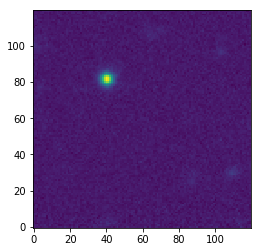

In [12]:
coord = SkyCoord(149.32, 2.18, frame='icrs', unit='deg')
w_half, h_half = 10.0 * u.arcsec, 10.0 * u.arcsec

cutout_url = s18a.form_cutout_url(coord, w_half=w_half, h_half=h_half)

cutout_hdu = s18a.get_cutout_image(coord, w_half=w_half, h_half=h_half)

cutout_wcs = wcs.WCS(cutout_hdu[1].header)

plt.imshow(np.arcsinh(cutout_hdu[1].data), origin='lower')

In [11]:
s18a.download_cutout(coord, 'tmp.fits', w_half=w_half, h_half=h_half)

s18a.download_cutout(coord, 'tmp.tar', img_type='warp', w_half=w_half, h_half=h_half)

### Test the RGB color figure generation

In [124]:
s_phy = 15.0 * u.Unit('kpc')
redshift = 0.3
prefix = os.path.join('./', 'test_rgb')

cutout_rgb, cutout_wcs = hsc_tricolor(
    coord, cutout_size=s_phy, redshift=redshift, prefix=prefix, 
    filters='gri', verbose=True, save_rgb=True, save_img=True, use_saved=True)

# RGB picture will be saved as /Users/song/Downloads/test_rgb_gri.jpg
# Read in saved FITS file: True
# Read in saved FITS file: True
# Read in saved FITS file: True


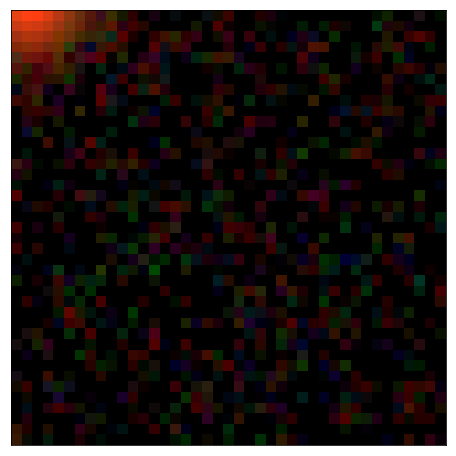

In [125]:
fig = plt.subplots(figsize=(8,8))
plt.imshow(cutout_rgb, origin='lower')
plt.xticks([])
plt.yticks([])
plt.show()